In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


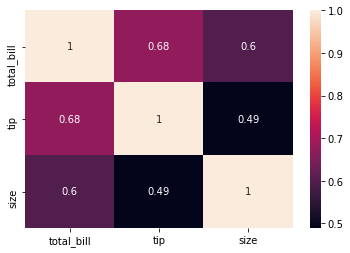

In [5]:
sns.heatmap(df.corr(), annot =True, fmt='.2g');

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


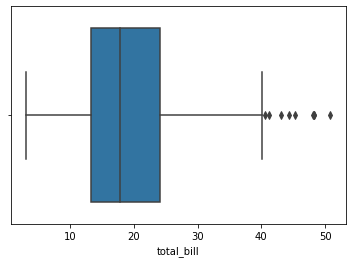

In [6]:
sns.boxplot('total_bill', data=df);

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


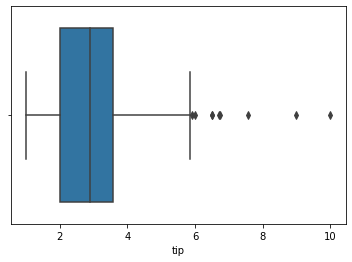

In [7]:
sns.boxplot('tip', data=df);

In [8]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final
                                      

In [9]:
print(finding_outlier(df['total_bill']))
print(finding_outlier(df['tip']))

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64
23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64


In [34]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final
                    

In [35]:
df2 = remove_outlier(df[['total_bill', 'tip']])

df2.dropna(axis=0, inplace=True)

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

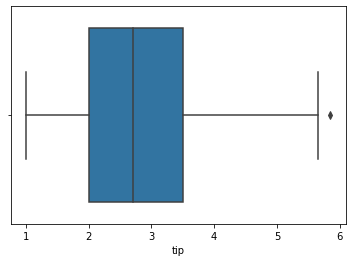

In [12]:
sns.boxplot('tip', data=df2)

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

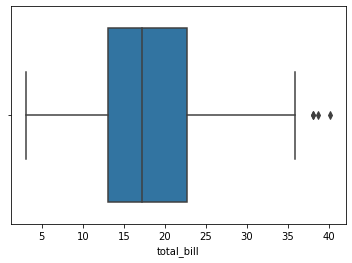

In [13]:
sns.boxplot('total_bill', data=df2)

In [14]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)
df_std

array([[-0.20659308, -1.65888912],
       [-1.13058579, -1.05862258],
       [ 0.35197093,  0.64059349],
       [ 0.72295748,  0.46513096],
       [ 0.84939858,  0.74217706],
       [ 0.94666098,  1.75801274],
       [-1.34873144, -0.744637  ],
       [ 1.16758555,  0.28966843],
       [-0.47753831, -0.78157648],
       [-0.51366435,  0.391252  ],
       [-1.14031203, -1.01244823],
       [ 2.33195531,  2.02582397],
       [-0.42473873, -1.1417364 ],
       [-0.00651045,  0.17884999],
       [-0.50671703,  0.19731973],
       [ 0.43117031,  1.02845802],
       [-1.13197526, -1.04938771],
       [-0.30385547,  0.83452575],
       [-0.20937201,  0.64059349],
       [ 0.30195027,  0.50207044],
       [-0.07737305,  1.17621594],
       [ 0.25192961, -0.05202176],
       [-0.37610754, -0.53223499],
       [ 0.18662487,  0.34507765],
       [-0.09265714, -0.43065142],
       [-0.70957859, -0.744637  ],
       [-0.80406205, -0.744637  ],
       [ 0.44784386,  1.37938308],
       [ 0.163004  ,

In [15]:
#Clustering with KMeans

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1
kmeans1

KMeans(n_clusters=2, random_state=42)

In [16]:
new_df = pd.DataFrame(data=df_std, columns=['total_bill', 'tip'])
new_df['label1_kmeans'] = labels1

In [17]:
new_df

,total_bill,tip,label1_kmeans
0,-0.206593,-1.658889,1
1,-1.130586,-1.058623,1
2,0.351971,0.640593,0
3,0.722957,0.465131,0
4,0.849399,0.742177,0
...,...,...,...
224,2.411155,1.721073,0
225,1.209269,-0.744637,0
226,0.582622,-0.744637,1
227,-0.091268,-0.975509,1


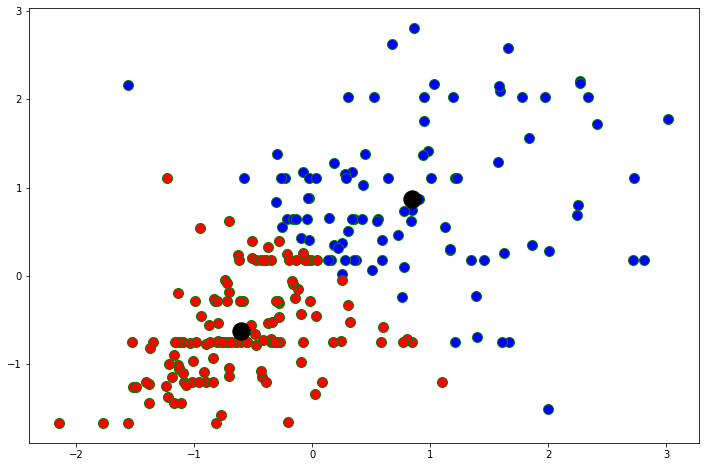

In [18]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['total_bill'][new_df.label1_kmeans == 0], new_df['tip'][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['total_bill'][new_df.label1_kmeans == 1], new_df['tip'][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


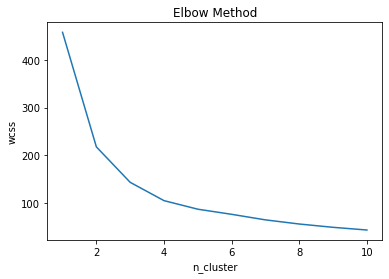

In [19]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [20]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([1, 1, 0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 1, 3,
       0, 3, 2, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 2,
       0, 1, 0, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 3, 2,
       3, 0, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 3, 3, 3, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       2, 3, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 1, 1, 2, 3, 2, 2, 1, 0])

In [21]:
new_df['label2_kmeans'] = labels2
new_df

,total_bill,tip,label1_kmeans,label2_kmeans
0,-0.206593,-1.658889,1,1
1,-1.130586,-1.058623,1,1
2,0.351971,0.640593,0,0
3,0.722957,0.465131,0,0
4,0.849399,0.742177,0,0
...,...,...,...,...
224,2.411155,1.721073,0,3
225,1.209269,-0.744637,0,2
226,0.582622,-0.744637,1,2
227,-0.091268,-0.975509,1,1


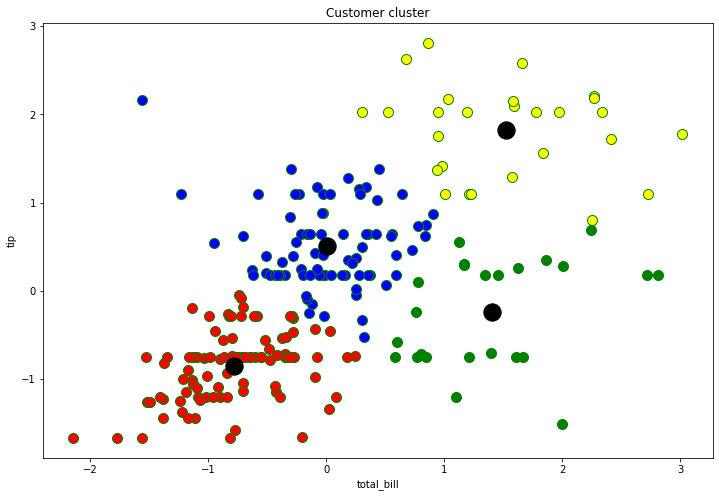

In [22]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['total_bill'][new_df.label2_kmeans == 0], new_df['tip'][new_df.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans == 1], new_df['tip'][new_df.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans == 2], new_df['tip'][new_df.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans == 3], new_df['tip'][new_df.label2_kmeans == 3], c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Customer cluster')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels=labels1))
print(silhouette_score(df_std, labels=labels2))

0.45269332601784357
0.4638353033975314


Inverse_transform

In [24]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labelsa = kmeansa.labels_
labelsa

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1])

In [25]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([1, 1, 0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 1, 3,
       0, 3, 2, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 3, 1, 1, 0, 3, 0, 0, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 2,
       0, 1, 0, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 3, 2,
       3, 0, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 3, 3, 3, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       2, 3, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 1, 1, 2, 3, 2, 2, 1, 0])

In [36]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['total_bill', 'tip'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

ValueError: Shape of passed values is (223, 3), indices imply (223, 2)

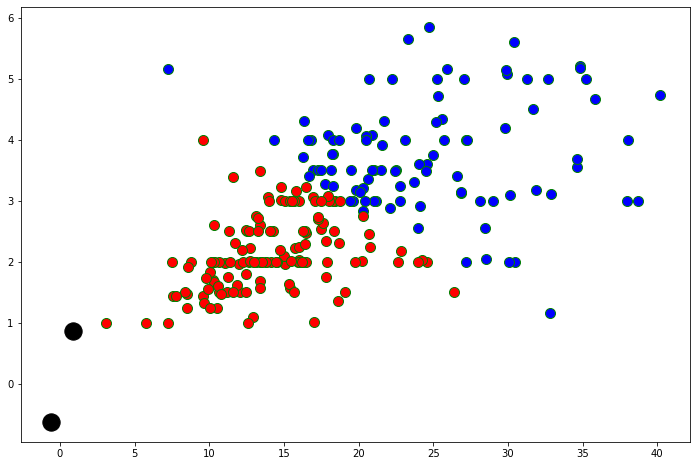

In [27]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['total_bill'][new_df1.label1_kmeans == 0], new_df1['tip'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label1_kmeans == 1], new_df1['tip'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

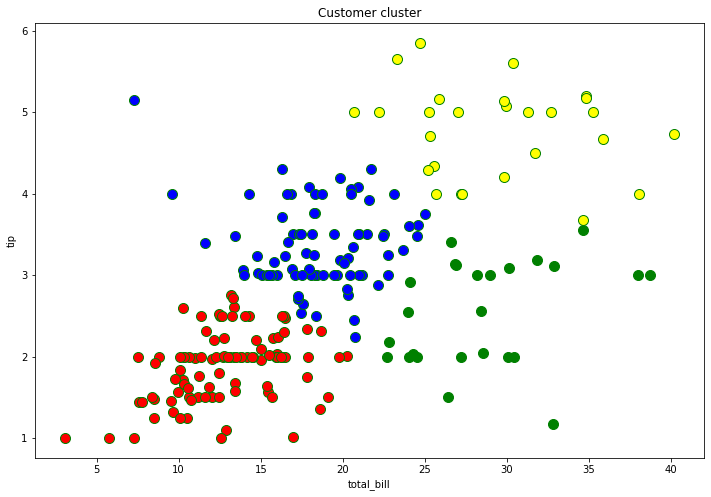

In [28]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 0], new_df1['tip'][new_df1.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 1], new_df1['tip'][new_df1.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 2], new_df1['tip'][new_df1.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 3], new_df1['tip'][new_df1.label2_kmeans == 3], c='yellow', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Customer cluster')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [29]:
df3 = remove_outlier(df[['total_bill', 'tip', 'size']])

df3.dropna(axis=0, inplace=True)
df3

,total_bill,tip,size
0,16.99,1.01,2.0
1,10.34,1.66,3.0
2,21.01,3.50,3.0
3,23.68,3.31,2.0
4,24.59,3.61,4.0
...,...,...,...
238,35.83,4.67,3.0
240,27.18,2.00,2.0
241,22.67,2.00,2.0
242,17.82,1.75,2.0


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df3.astype(float))

In [31]:
kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels3 = kmeans3.labels_

In [32]:
new_df = pd.DataFrame(data=df_std, columns=['total_bill', 'tip', 'size'])
new_df['label3_kmeans'] = labels3

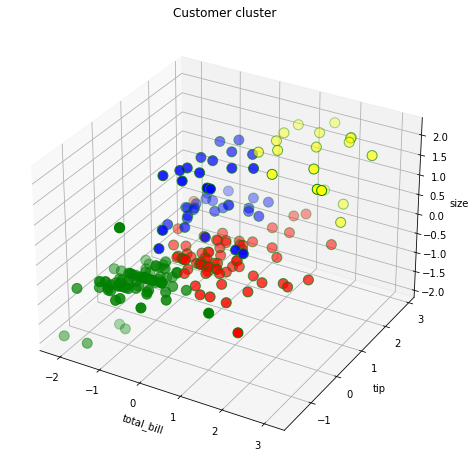

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['total_bill'][new_df.label3_kmeans == 0], new_df['tip'][new_df.label3_kmeans == 0], new_df['size'][new_df.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans == 1], new_df['tip'][new_df.label3_kmeans == 1], new_df['size'][new_df.label3_kmeans == 1], c='red', s=100, edgecolor='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans == 2], new_df['tip'][new_df.label3_kmeans == 2], new_df['size'][new_df.label3_kmeans == 2], c='green', s=100, edgecolor='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans == 3], new_df['tip'][new_df.label3_kmeans == 3], new_df['size'][new_df.label3_kmeans == 3], c='yellow', s=100, edgecolor='green')

# plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1],kmeans3.cluster_centers_[:, 2], c='k', s=300 )
plt.title('Customer cluster')
plt.xlabel('total_bill')
plt.ylabel('tip')
ax.set_zlabel('size')
plt.show()